In [2]:
import pandas as pd

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot: >

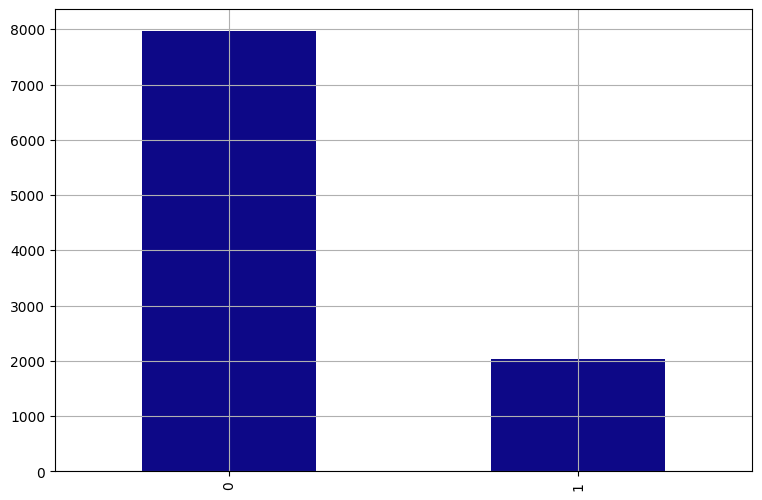

In [22]:
import matplotlib.pyplot as plt
 
exited_clients = churn_data['Exited'].value_counts()
display(exited_clients)
exited_clients.plot(kind = 'bar',
                    grid = True,
                    figsize = (9,6),
                    colormap = 'plasma')

Исходя из полученного графика, мы видим, что лояльных клиентов(7963) почти в 4 раза больше чем ушедших(2037).

In [23]:
import plotly
import plotly.express as px
import seaborn as sns

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

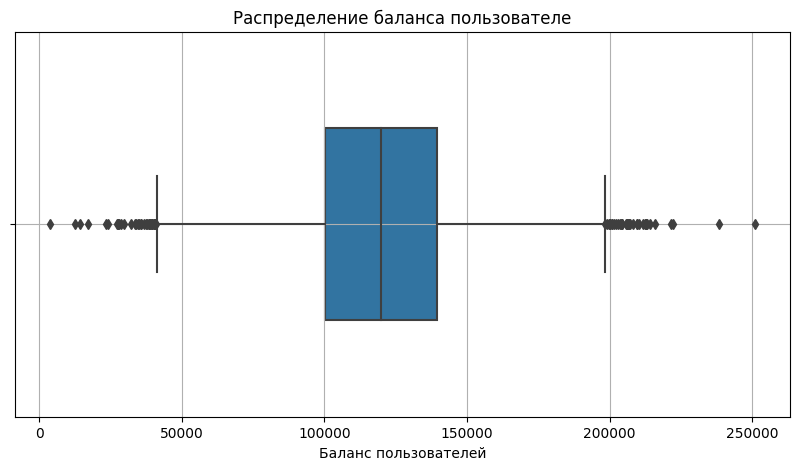

In [26]:
fig = plt.figure(figsize=(10,5))
boxplot = sns.boxplot(data=churn_data[churn_data['Balance']>2500],
                      x = 'Balance',
                      orient = 'h',
                      width = 0.5)

boxplot.set_title('Распределение баланса пользователе')
boxplot.set_xlabel('Баланс пользователей')
boxplot.grid();

Исходя из данной диаграммы мы видим, что большое количество клиентов держут на счетах от 100 до примерно 140 тыс. Вероятнее всего, это связано с тем, что для суммы в этом интервале установлена наиболее выгодная процентная ставка.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.



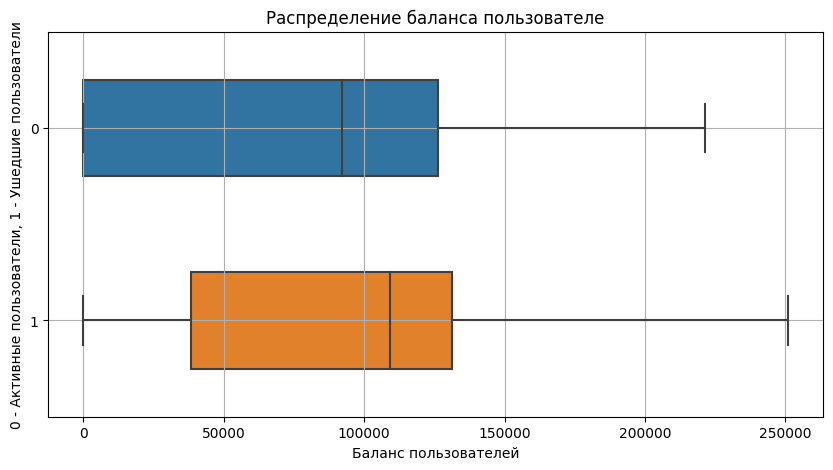

In [28]:
fig = plt.figure(figsize=(10,5))
boxplot = sns.boxplot(data=churn_data,
                      y = 'Exited',
                      x = 'Balance',
                      orient = 'h',
                      width = 0.5)

boxplot.set_title('Распределение баланса пользователе')
boxplot.set_xlabel('Баланс пользователей')
boxplot.set_ylabel('0 - Активные пользователи, 1 - Ушедшие пользователи')
boxplot.grid();

Исходя из диаграммы, мы видим, что у активных пользователей суммы распределяются от 0 до примерно 120 тысяч, в то время как у ушедших от 40 до 125, это может быть связано с тем, что ушедших клиентов не устраивает процентная ставка по счёту, которая установлена до суммы в 40 - 50 тыс.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?



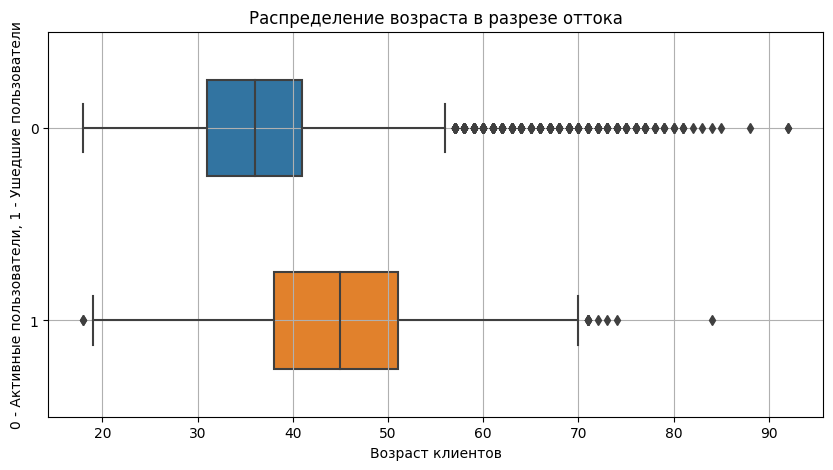

In [36]:
fig = plt.figure(figsize=(10,5))
boxplot = sns.boxplot(data=churn_data,
                      y = 'Exited',
                      x = 'Age',
                      orient = 'h',
                      width = 0.5)

boxplot.set_title('Распределение возраста в разрезе оттока')
boxplot.set_xlabel('Возраст клиентов')
boxplot.set_ylabel('0 - Активные пользователи, 1 - Ушедшие пользователи')
boxplot.grid();

Как мы видим большее количество активных клиентов у нас находится в промежутке от 31 до 41 года, в то время как ушедих в промежутке от 38 до 51 года. Потенциальных выбросов больше в категории активных клиентов, они все находятся в возрастной зоне 55+. Банку стоит обратить внимание на клиентов возрастной категории от 38 до 43 лет, т.к. в этой зоне имеются как активные, так и ушедшие клиенты.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.



In [37]:
fig = px.scatter(
    data_frame=churn_data,
    x = 'CreditScore',
    y = 'EstimatedSalary',
    color='Exited',
    width=1200,
    height=600
)
fig.show()

Исходя из данного графика мы видим что явная взаимосвязь между предполагаемой зарплатой и кредитным рейтинго не видна. Единственное что можно сказать по данному графику, это то, что чем ниже кредитный рейтинг клиента, тем больше он подвергнут уходу из банка и наоборот, но опять же, предполагаемая заработная плата на это явно не влияет.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.



In [45]:
gender_data = churn_data.groupby('Gender', as_index=False)['Exited'].mean()
gender_data

,Gender,Exited
0,Female,0.250715
1,Male,0.164559


In [46]:
fig = px.pie(gender_data,
             values = 'Exited',
             names = 'Gender',
             height = 500,
             width = 1000,
             title = 'Соотношение ушедших клиентов банка по гендеру');
fig.show()

Исходя из данной диаграммы ,мы видим, что в среднем, чаще из банка уходят женщины.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.



Text(0.5, 0, 'Количество продуктов')

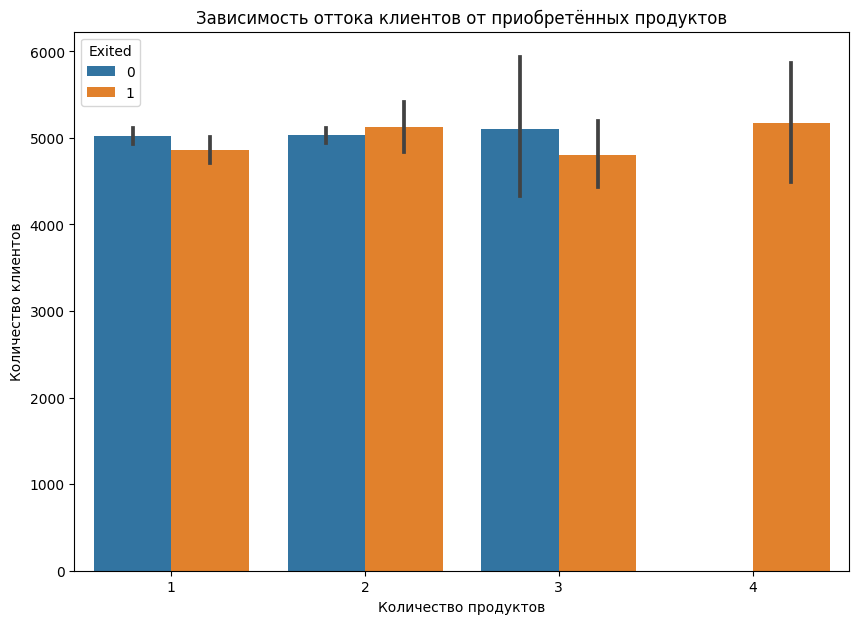

In [81]:
fig = plt.figure(figsize=(10,7))
barplot = sns.barplot(data=churn_data,
                      x = 'NumOfProducts',
                      y = 'RowNumber',
                      hue = 'Exited',
                      )

barplot.set_title('Зависимость оттока клиентов от приобретённых продуктов')
barplot.set_ylabel('Количество клиентов')
barplot.set_xlabel('Количество продуктов')

Исходя из данной диаграммы, можно сказать, в среднем из банка уходят клиенты, которые приобретают более 3 продуктов.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?



Text(0.5, 0, 'Статус активности(1 - активен, 0 - неактивен )')

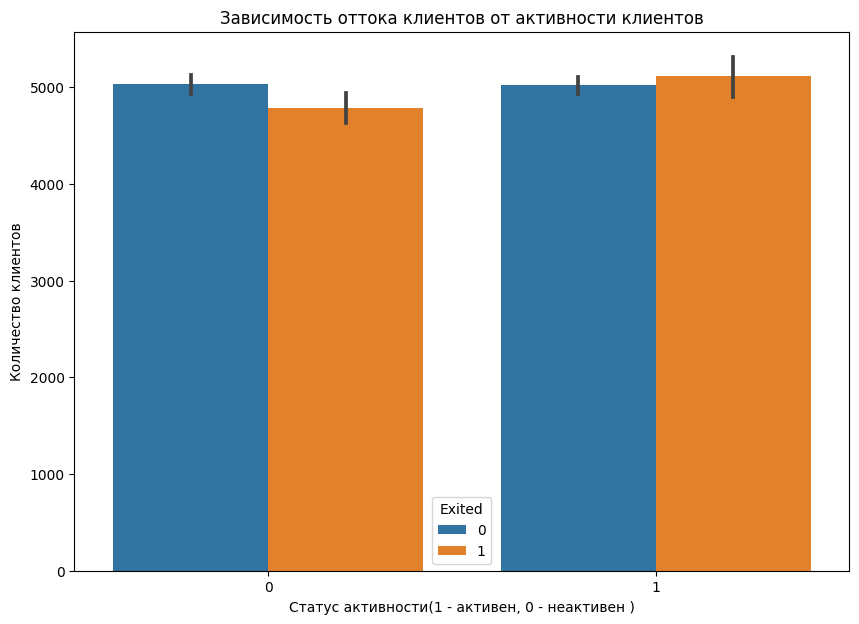

In [84]:
fig = plt.figure(figsize=(10,7))
barplot = sns.barplot(data=churn_data,
                      x = 'IsActiveMember',
                      y = 'RowNumber',
                      hue = 'Exited')

barplot.set_title('Зависимость оттока клиентов от активности клиентов')
barplot.set_ylabel('Количество клиентов')
barplot.set_xlabel('Статус активности(1 - активен, 0 - неактивен )')

Исходя из данной таблицы мы видим, что при наличии статуса активного клиента шанс клиента на уход из банка выше по сравнению с неактивным клиентом. Чтобы уменьшить отток неактивных клиентов можно предложить неактивным клиентам оформление какого либо продукта на льготных условиях(бесплатное обслуживание дебитовой или кредитной карты, спец предложение по кредитованию, повышенная ставка по вкладу и т.д.) 

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.



In [154]:
new_data = churn_data.groupby('Geography', as_index=False)['Exited'].mean()
display(new_data)

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


In [156]:

fig = px.choropleth(data_frame = new_data,
                    locations = 'Geography',
                    locationmode = 'country names',
                    color = 'Exited',
                    range_color = [0, 1],
                    title = 'Отток клиентов по странам',
                    width = 800,
                    height = 500,
                    color_continuous_scale = 'Reds')
fig.show()

Исходя из данной диаграммы, мы видим, что наибольший отток клиентов происходит в Германии. 

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.



In [115]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [117]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

In [120]:
pivot = churn_data.pivot_table(values='Exited',
                               columns = 'Tenure',
                               index = 'CreditScoreCat'
                               )

display(pivot)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


Text(50.722222222222214, 0.5, 'Кредитный рейтинг клиента')

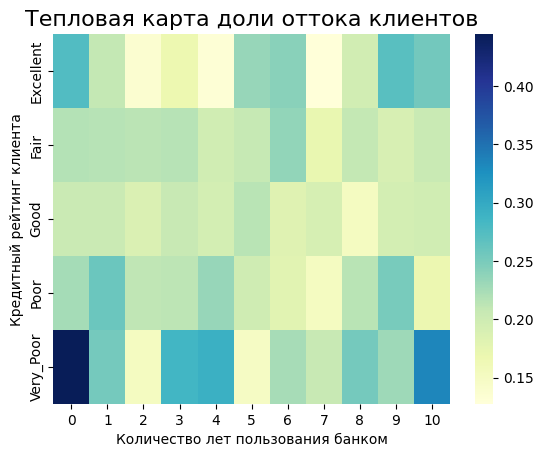

In [123]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта доли оттока клиентов', fontsize = 16)
heatmap.set_xlabel('Количество лет пользования банком')
heatmap.set_ylabel('Кредитный рейтинг клиента')

Исходя из данной таблицы, мы видим что чаще всего из банка уходят клиенты с кредитным рейтингом Very_poor, срок пользования продуктами банка у которых составляет меньше года.